# Bepaling trend voor een tijdreeksmodel

_D.A. Brakenhoff, Artesia, 2025_

---

Dit notebook bevat een voorbeeld van het toepassen van de KRW trendanalyse
methode met een tijdreeksmodel.

In [100]:
import pandas as pd
import pastastore as pst

import krw_trendanalyse as krw

We maken hier gebruik van een bestaande PastaStore met de stijghoogtereeksen
van Provincie Zeeland.

In [ ]:
pastastore_config = (
    "../gwdatalens/gwdatalens/pastasdb/zeeland_bro/zeeland_bro.pastastore"
)
pstore = pst.PastaStore.from_pastastore_config_file(pastastore_config)
pstore

We kiezen alleen meetpunten uit met metingen in de afgelopen 5 jaar.

In [ ]:
tmintmax = pstore.get_tmin_tmax("oseries")
mask = tmintmax["tmax"] > pd.Timestamp("2020")
names = tmintmax.loc[mask].index.tolist()

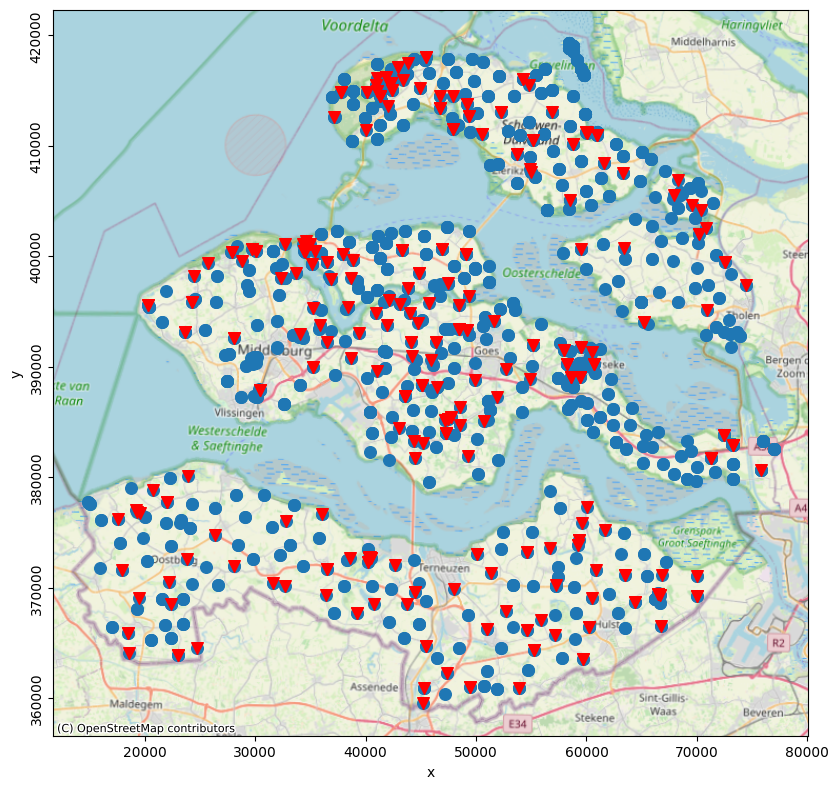

In [105]:
ax = pstore.maps.oseries(labels=False, backgroundmap="nlmaps.water")
ax = pstore.maps.oseries(names=names, marker="v", color="r", ax=ax, labels=False)

We kiezen een willekeurige locatie uit om de trendanalyse op toe te passen. 

We laden het tijdreeksmodel in voor die locatie.

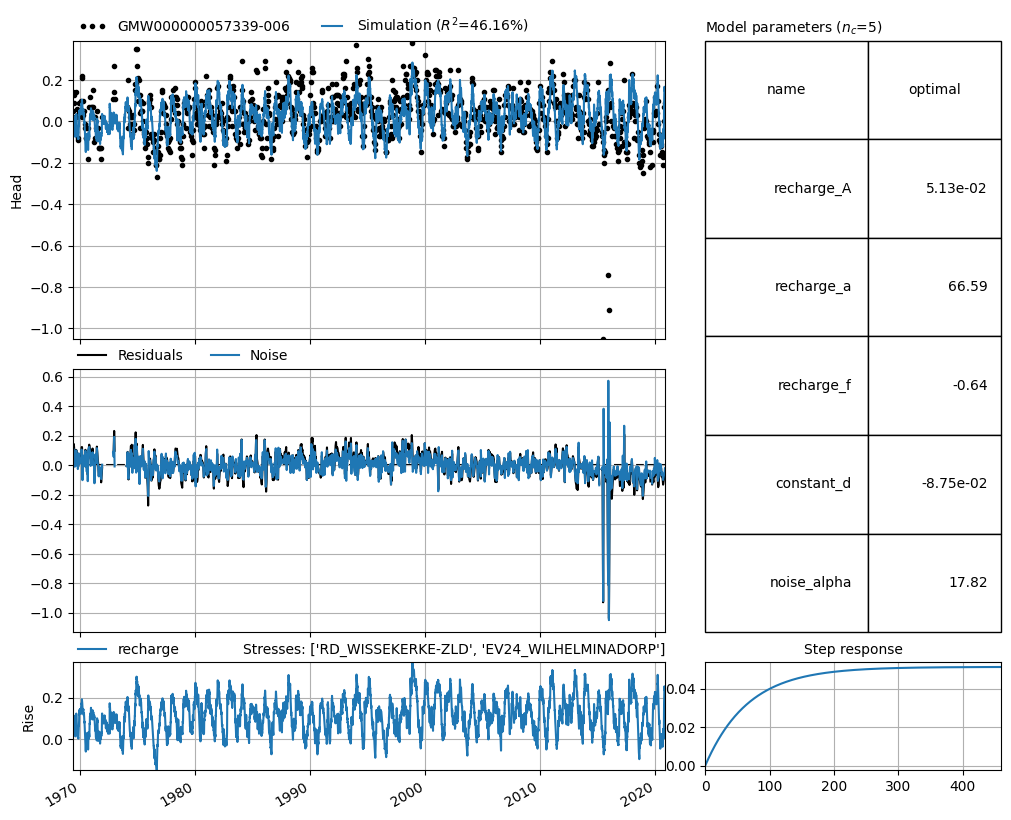

In [106]:
i = 44
ml = pstore.models[names[i]]

axes = ml.plots.results()

Hier specificeren we voor welke periodes de gemiddelde grondwaterstanden moeten worden bepaald. Vervolgens berekenenen we de gemiddeldes met `krw.model_residual_period_stats()`.

In [107]:
periods = [
    ("2000", "2005"),
    ("2006", "2011"),
    ("2012", "2017"),
    ("2018", "2023"),
]
df_trend = krw.model_residual_period_stats(ml, periods)

In [108]:
df_trend

,reference,start,end,mean,var,Δmean,Δvar,ci
GMW000000057339-006,,,,,,,,
0,*,2000-01-01,2005-12-31,0.005799,0.000052,0.000000,0.000000,0.000000
1,,2006-01-01,2011-12-31,0.003254,0.000051,-0.002545,0.000103,0.019936
2,,2012-01-01,2017-12-31,-0.063833,0.002911,-0.069632,0.002963,0.106689
3,,2018-01-01,2023-12-31,-0.085032,0.001165,-0.090830,0.001217,0.068381


Plotten van resultaten.

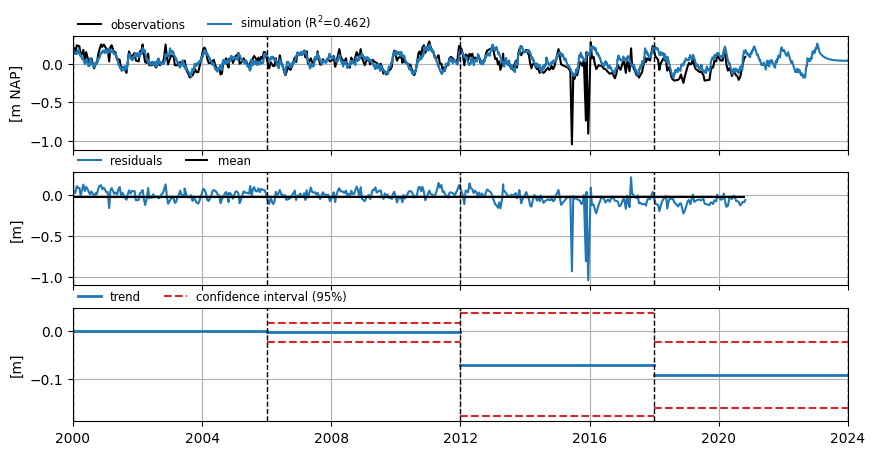

In [109]:
axes = krw.plots.plot_model_residuals_summary(ml, df_trend)

We kunnen gemiddeldes per periode ook bepalen o.b.v. de stijghoogtereeks zelf. Hier kiezen we de laatste periode als referentieperiode.

In [113]:
df = krw.mean_per_period(ml.oseries.series_original, periods, iref=3)
df

,reference,start,end,mean,var,Δmean,Δvar,ci
0,,2000-01-01,2005-12-31,0.047080,0.001227,0.102343,0.002996,0.107271
1,,2006-01-01,2011-12-31,0.037077,0.000818,0.092340,0.002587,0.099688
2,,2012-01-01,2017-12-31,-0.017542,0.001045,0.037721,0.002813,0.103956
3,*,2018-01-01,2023-12-31,-0.055263,0.001769,0.000000,0.000000,0.000000


Plotten van bovenstaande resultaten.

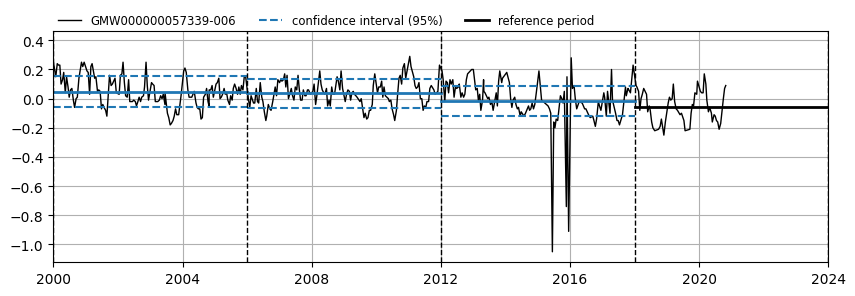

In [114]:
ax = krw.plots.plot_mean_per_period(
    ml.oseries.series_original, df, color_method="significance"
)